In [1]:
import geopandas as gpd
import numpy as np
import shapely
import matplotlib.pyplot as plt

In [44]:
rivers = gpd.read_file("na_sword_reaches_v16.gpkg").set_index('reach_id')
east_coast = gpd.read_file("east_coast.geojson")
coast = gpd.read_file("tl_2019_us_coastline.zip")

In [45]:
# use only coastal and wide
coast = coast[coast.intersects(east_coast.union_all())]
rivers_east = rivers[rivers.intersects(east_coast.union_all())]
r = rivers_east.loc[rivers_east['n_rch_dn'] == 0].loc[rivers_east['width'] > 100]

<Axes: >

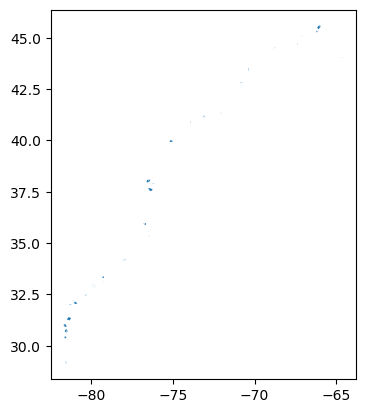

In [46]:
r.plot()

In [47]:
# put point 20 km upriver

# # use next reach up if it's not long enough
ids = np.array(r.index)

# geometry for down (use for coastal)


# #while r.loc[ids, 'dist_out'].min() / 1000  < 10: 
for i in ids: 
    if r.to_crs('EPSG:32618').length[i] / 1000  < 5: 
        nextup = r.loc[i, 'rch_id_up']
        if len(nextup) == 11: 
            # add new id to list
            if int(nextup) in np.array(r.index): 
                ids = np.append(ids, nextup)
                #r.loc[i, 'geometry'] = rivers.loc[[i, int(nextup)]]
        else: 
        # remove old id
            ids = np.delete(ids, np.where(ids == i))
        # ids.remove(i)

In [48]:
# only include those at least 5km long
new_r = r.loc[ids].loc[r.loc[ids].to_crs('EPSG:32618').length / 1000 > 5]

In [49]:
new_r = r.loc[ids]

<Axes: >

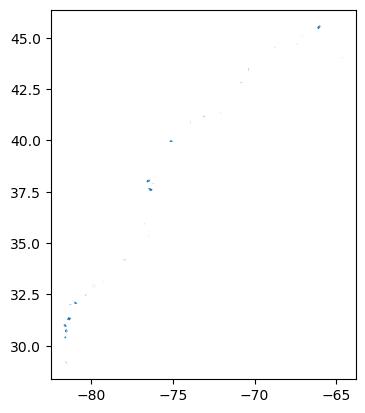

In [50]:
new_r.plot()

In [13]:
points_1 = shapely.get_point(new_r.geometry, -1)
points_1 = points_1.set_crs(new_r.crs)
##points_1.to_crs("EPSG:4326").to_file("river_points.geojson")

In [131]:
rivers_east.to_file("rivers_east.geojson")

In [51]:
# edit manually in GIS to make them look good
# then manually add coastal points and load them here for matchup
coastal = gpd.read_file("coastal_points.zip")

In [146]:
points_1 = points_1.set_crs(new_r.crs)

In [72]:
rivers = gpd.read_file('river_points.geojson')

<Axes: >

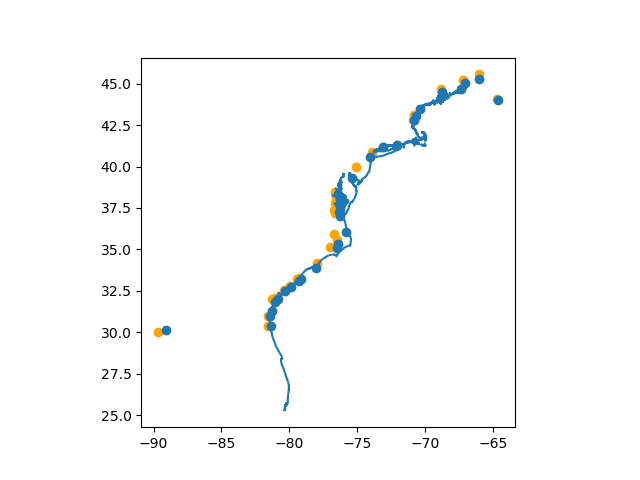

In [73]:
fig, ax = plt.subplots()
rivers.to_crs(coastal.crs).plot(ax=ax, color = "orange")
coastal.plot(ax = ax)
coast.plot(ax=ax)

In [74]:
# match up closest
rivers['id'] = rivers.index
coastal['id'] = coastal.index

In [78]:
rivers['lat'] = rivers.geometry.y
coastal['lat'] = coastal.geometry.y

In [79]:
coastal.loc[0:0]

,id,geometry,lat
0,0,POINT (-80.35407 32.48158),32.481584


In [80]:
coastal_sorted = coastal.sort_values('lat')
rivers_sorted = rivers.sort_values('lat')

In [81]:
coastal_sorted

,id,geometry,lat
1,1,POINT (-89.07622 30.12928),30.129284
2,2,POINT (-81.37818 30.40138),30.401382
3,3,POINT (-81.43871 30.9838),30.983800
4,4,POINT (-81.2619 31.29334),31.293339
5,5,POINT (-81.03174 31.84046),31.840464
6,6,POINT (-80.8524 32.04579),32.045787
0,0,POINT (-80.35407 32.48158),32.481584
7,7,POINT (-79.847 32.73551),32.735512
8,8,POINT (-79.27925 33.10479),33.104791
9,9,POINT (-79.17553 33.19835),33.198355


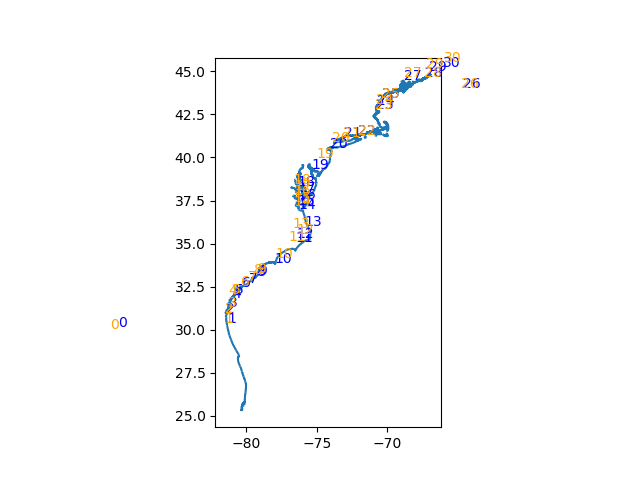

In [82]:
%matplotlib widget
fig, ax = plt.subplots()
coast.plot(ax=ax)
for i in range(coastal_sorted.shape[0]):
        ax.text(coastal_sorted.iloc[i].geometry.x, 
                coastal_sorted.iloc[i].geometry.y, 
                str(i), color = "blue")
for i in range(rivers_sorted.shape[0]):
        ax.text(rivers_sorted.iloc[i].geometry.x, 
                rivers_sorted.iloc[i].geometry.y,
                str(i), color = "orange")


In [87]:
rivers_sorted['id'] = range(31)
coastal_sorted['id'] = range(31)

In [89]:
rivers_sorted.to_file("river_points.geojson")
coastal_sorted.to_file("coastal_points.geojson")

In [22]:
order = []
for i in range(coastal.shape[0]): 
    d= coastal.distance(rivers.loc[i:i].union_all())
    order.append(np.where(d == min(d)))
    

/tmp/ipykernel_131/3278116841.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  d= coastal.distance(rivers.loc[i:i].union_all())


In [23]:
order

[(array([30]),),
 (array([29]),),
 (array([27]),),
 (array([26]),),
 (array([28]),),
 (array([24]),),
 (array([25]),),
 (array([23]),),
 (array([22]),),
 (array([8]),),
 (array([20]),),
 (array([19]),),
 (array([9]),),
 (array([11]),),
 (array([17]),),
 (array([12]),),
 (array([18]),),
 (array([12]),),
 (array([10]),),
 (array([15]),),
 (array([15]),),
 (array([0]),),
 (array([7]),),
 (array([6]),),
 (array([5]),),
 (array([4]),),
 (array([3]),),
 (array([3]),),
 (array([2]),),
 (array([18]),),
 (array([21]),)]